### NAME: ATUGHARA JOHN

### PROJECT:  Cars4U
### OVERVIEW

To explore the dataset, visualize and build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

### Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

### DATA UNDERSTANDING

I started by reading the csv stored data using the pandas library inorder to understand the data make up

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.min_rows", 100)
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

cars = pd.read_csv("used_cars_data.csv")

In [2]:
#inspecting the first five rows
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [3]:
#checking the concise summary of the data
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [4]:
cars.shape

(7253, 14)

From the output above, we can see that the data set has 7253 rows and 14 columns

In [5]:
#checking for number of missing data points
cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [6]:
print("S.No.: \n \n {}".format(cars["S.No."].unique()))
print("\n")
print("Name: \n \n {}".format(cars["Name"].unique()))
print("\n")
print("Location: \n \n {}".format(cars["Location"].unique()))
print("\n")
print("Year: \n \n {}".format(cars["Year"].unique()))
print("\n")
print("Kilometers_Driven: \n \n {}".format(cars["Kilometers_Driven"].unique()))
print("\n")
print("Fuel_Type: \n \n {}".format(cars["Fuel_Type"].unique()))
print("\n")
print("Transmission: \n \n {}".format(cars["Transmission"].unique()))
print("\n")
print("Owner_Type: \n \n {}".format(cars["Owner_Type"].unique()))
print("\n")
print("Mileage: \n \n {}".format(cars["Mileage"].unique()))
print("\n")
print("Engine: \n \n {}".format(cars["Engine"].unique()))
print("\n")
print("Power: \n \n {}".format(cars["Power"].unique()))
print("\n")
print("Seats: \n \n {}".format(cars["Seats"].unique()))
print("\n")
print("New_Price: \n \n {}".format(cars["New_Price"].unique()))
print("\n")
print("Price: \n \n {}".format(cars["Price"].unique()))

S.No.: 
 
 [   0    1    2 ... 7250 7251 7252]


Name: 
 
 ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']


Location: 
 
 ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


Year: 
 
 [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]


Kilometers_Driven: 
 
 [72000 41000 46000 ... 89411 52262 72443]


Fuel_Type: 
 
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


Transmission: 
 
 ['Manual' 'Automatic']


Owner_Type: 
 
 ['First' 'Second' 'Fourth & Above' 'Third']


Mileage: 
 
 ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' '14.84 kmpl' '22.69 

In [7]:
#checking the description of the dataset
cars.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


### OBSERVATIONS

From the above steps in understanding the data make up, the following were observed:

1. There are missing rows in the following columns "Engine", "Power", "Seats" and "Price".
2. The units for Mileage is showing as KM/KG and KMPL, except for electric fuel type
4. Engine, Power and Mileage contains units with their values and we need to remove them

# DATA CLEANING

From the data inspection above, we can safely conclude that some of the columns are clean.
Such columns include:

* S.No.  
* Name
* Location 
* Year
* Kilometers_Driven    
* Fuel_Type           
* Transmission      
* Owner_Type          

#### Stripping the units "CC" and "bhp" from "Engine" and "Power"

In [8]:
cars["Engine"] = cars["Engine"].str.replace('CC', '').astype(float)
cars["Power"] = cars["Power"].str.replace('bhp', '').astype(float)

#### Next we looked at filling the missing values in the columns with Nan

We checked the null values of "Engine", "Power", "Mileage", "Seat and "Price"

In [9]:
#checking null values found in "Engine"
cars[cars["Engine"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.550,1.93


In [10]:
#checking null values found in "Power"
cars[cars["Power"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399.0,NaN,5.0,11.685,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086.0,NaN,5.0,4.550,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086.0,NaN,5.0,4.550,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086.0,NaN,5.0,4.550,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086.0,NaN,5.0,4.550,1.67
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
227,227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8 kmpl,1248.0,NaN,5.0,7.880,4.10
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0 kmpl,1086.0,NaN,5.0,4.550,0.95
262,262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086.0,NaN,5.0,4.550,1.75


In [11]:
#checking null values found in "Mileage"
cars[cars["Mileage"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


In [12]:
#checking null values found in "Seats"
cars[cars["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498.0,99.0,NaN,7.650,3.60
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493.0,100.0,NaN,13.580,1.70


In [13]:
#checking null values found in "Mileage"
cars[cars["Price"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.20,4.0,4.360,NaN
6020,6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.30,5.0,4.360,NaN
6021,6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.80,7.0,25.270,NaN
6022,6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,NaN,5.0,8.525,NaN
6023,6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.85,5.0,10.250,NaN
6024,6024,Mahindra XUV500 W8 2WD,Coimbatore,2016,85609,Diesel,Manual,Second,16.0 kmpl,2179.0,140.00,7.0,18.865,NaN
6025,6025,Toyota Fortuner 4x2 AT TRD Sportivo,Pune,2015,59000,Diesel,Automatic,First,12.55 kmpl,2982.0,168.70,7.0,37.170,NaN
6026,6026,Hyundai EON Era Plus,Jaipur,2013,65000,Petrol,Manual,First,21.1 kmpl,814.0,55.20,5.0,10.250,NaN
6027,6027,Honda City 1.5 S MT,Mumbai,2011,66000,Petrol,Manual,Second,17.0 kmpl,1497.0,118.00,5.0,13.580,NaN
6028,6028,Mahindra XUV500 W6 2WD,Coimbatore,2015,54684,Diesel,Manual,First,15.1 kmpl,2179.0,140.00,7.0,18.865,NaN


#### To fill the missing values found in "Engine", "Power", "Mileage", "Seat" and "Price", we looked at different ways to carry out missing values imputation. However, since they are numerical values, we chose to fill them with the mean of the respective columns.

In [14]:
#filling the missing values using the replace method
cars["Engine"].replace(np.nan, cars["Engine"].mean(),inplace=True)
cars["Power"].replace(np.nan, cars["Power"].mean(),inplace=True)
cars["Mileage"].replace(np.nan, cars["Engine"].mean(),inplace=True)
cars["Seats"].replace(np.nan, cars["Seats"].mean(),inplace=True)
cars["Price"].replace(np.nan, cars["Price"].mean(),inplace=True)

In [15]:
#checking the total null values again if there are any left
cars.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

### Cleaning Mileage Column

In [16]:
#Inspecting the Mileage Column
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.74


From the output above, it is observed that Mileage has it's values in kmpl and km/kg. We will need to strip these units and convert the dtypes to float.

In [17]:
#Checking the number of rows with km/kg unit and kmpl unit

kmkg = 0
kmpl = 0
for i in cars["Mileage"]:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 


From the output above, it was observed that there are 74 rows of Mileage column with Km/Kg as the meaurement unit and 7177 rows as Kmpl meaurement unit.

In [18]:
#filtering rows that the fuel type is CNG and LPG
cars[cars["Fuel_Type"].isin(["CNG", "LPG"])]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.510,1.750000
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814.0,55.20,5.0,10.250,2.350000
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.510,3.250000
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998.0,67.10,5.0,7.880,1.400000
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196.0,73.00,5.0,4.925,4.700000
839,839,Maruti Alto Green LXi (CNG),Delhi,2012,65537,CNG,Manual,First,26.83 km/kg,796.0,38.40,5.0,4.360,2.100000
893,893,Hyundai Accent Executive CNG,Hyderabad,2010,95637,CNG,Manual,Second,13.2 km/kg,1495.0,93.70,5.0,10.250,1.900000
936,936,Maruti Wagon R LXI LPG BSIV,Hyderabad,2012,72000,LPG,Manual,First,26.2 km/kg,998.0,58.20,5.0,5.510,2.850000
987,987,Maruti Wagon R LXI DUO BSIII,Mumbai,2008,64226,LPG,Manual,First,17.3 km/kg,1061.0,57.50,5.0,5.510,1.450000
1135,1135,Maruti Zen Estilo LXI Green (CNG),Ahmedabad,2011,76000,CNG,Manual,First,26.3 km/kg,998.0,67.10,5.0,7.880,2.000000


From the output above, it is observed again that the rows with fuel type as CNG and LPG were the only fuel types that had their Mileage unit as km/kg. With my research online, it is equally noted that both types of fuel (CNG and LPG) have different weight. We will need to convert all units in the mileage column to the same unit of kmpl (kilometer per litre) as others.


According to https://solutionsdezeeshan.blogspot.com/2012/09/conversion-of-cng-liter-to-kg.html#:~:text=1%20liter%20cng%20%3D%200.18%20kg%20at%20very,fills%20up%20with%20oil%20due%20to%20which%20Converting 

We found out that (1 litre of CNG = 0.18kg), i.e 1kg of CNG = 5.56 litres
Therefore 1km/kg = 1km/5.56 litres 
####          1km/kg = 0.18 kmpl
          
          

Also, According to https://www.elgas.com.au/blog/389-lpg-conversions-kg-litres-mj-kwh-and-m3/#:~:text=LPG%20Gas%20Unit%20Conversion%20Formulas%20%28Metric%29%3A%201%20Convert,gas%20to%20LPG%20liqu
          
          
We found out that 1kg of LPG = 1.96 litres
Therefore 1km/kg = 1km/1.96 litres 
####          1km/kg = 0.51 kmpl

Next we concatenate "fuel type" and "mileage" in other to have distinct values and converted the km/kg values of CNG and LPG to kmpl we stored the concat with in a new variable name.

In [19]:
#concatenating "mileage" and "fuel type"
cars["Mileage_combo"] = (cars["Mileage"]).astype("str") + " " + (cars["Fuel_Type"]).astype("str")

In [20]:
#for "mileage combo" column, electric has 9 characters from the right, i.e [:-9]
cars[cars["Fuel_Type"] == "Electric"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_combo
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,1616.57347,72.0,41.0,5.0,13.58,13.00,1616.5734702372695 Electric
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,1616.57347,1798.0,73.0,5.0,24.01,12.75,1616.5734702372695 Electric


In [21]:
cars["Mileage_combo"].head()

0       26.6 km/kg CNG
1    19.67 kmpl Diesel
2     18.2 kmpl Petrol
3    20.77 kmpl Diesel
4     15.2 kmpl Diesel
Name: Mileage_combo, dtype: object

Next we built a function to convert CNG and LPG mileage to kmpl using their conversion measurement.

* We multiplied all values of (LPG km/kg by 0.51) and (CNG km/kg by 0.81) to convert to kmpl

In [22]:
Converted_Mileage = []
for i in cars["Mileage_combo"]:
    if str(i).endswith('km/kg LPG'):
        i = i[:-10]
        i = float(i)*0.51
        Converted_Mileage.append(float(i))
    elif str(i).endswith('km/kg CNG'):
        i = i[:-10]
        i = float(i)*0.18
        Converted_Mileage.append(float(i))
    elif str(i).endswith("kmpl CNG"):
        i = i[:-9]
        i = float(i)*1
        Converted_Mileage.append(float(i))
    elif str(i).endswith("kmpl Diesel"):
        i = i[:-12]
        i = float(i)*1
        Converted_Mileage.append(float(i))
    elif str(i).endswith("kmpl Petrol"):
        i = i[:-12]
        i = float(i)*1
        Converted_Mileage.append(float(i))
    elif str(i).endswith("kmpl LPG"):
        i = i[:-9]
        i = float(i)*1
        Converted_Mileage.append(float(i))
    elif str(i).endswith("Electric"):
        i = i[:-9]
        i = float(i)*1
        Converted_Mileage.append(float(i))
    elif i == i:
        Converted_Mileage.append(i)
    

In [23]:
#converting to dataframe
cars["Converted_Mileage"] = pd.DataFrame(Converted_Mileage)

In [24]:
#displaying the first 5 rows of the new column
cars["Converted_Mileage"].head(5)

0     4.788
1    19.670
2    18.200
3    20.770
4    15.200
Name: Converted_Mileage, dtype: float64

In [25]:
cars["Converted_Mileage"].isnull().sum()

0

In [26]:
#printing the first ten rows of the dataframe
cars.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_combo,Converted_Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,5.51,1.75,26.6 km/kg CNG,4.788
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,16.06,12.50,19.67 kmpl Diesel,19.670
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61,4.50,18.2 kmpl Petrol,18.200
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,11.27,6.00,20.77 kmpl Diesel,20.770
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,53.14,17.74,15.2 kmpl Diesel,15.200
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814.0,55.20,5.0,10.25,2.35,21.1 km/kg LPG,10.761
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,9.47,3.50,23.08 kmpl Diesel,23.080
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755.0,171.50,8.0,21.00,17.50,11.36 kmpl Diesel,11.360
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,13.23,5.20,20.54 kmpl Diesel,20.540
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248.0,74.00,5.0,7.63,1.95,22.3 kmpl Diesel,22.300


Next, we will be dropping the "Mileage" and "Mileage_combo" columns and rename the "Converted_Mileage" column

In [27]:
cars.drop(['Mileage', 'Mileage_combo'], axis=1, inplace=True)

In [28]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Converted_Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,5.51,1.75,4.788
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,16.06,12.50,19.670
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,5.0,8.61,4.50,18.200
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,7.0,11.27,6.00,20.770
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,53.14,17.74,15.200


In [29]:
#renaming the converted mileage column
cars.rename(columns = {"Converted_Mileage":"Mileage"}, inplace = True)

In [30]:
cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,5.51,1.75,4.788
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,16.06,12.50,19.670
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199.0,88.70,5.0,8.61,4.50,18.200
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248.0,88.76,7.0,11.27,6.00,20.770
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,53.14,17.74,15.200


In [31]:
#checking the shape
cars.shape

(7253, 14)

In [32]:
cars.to_csv("cleaned_cars.csv")

In [33]:
#checking the null values again
cars.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Mileage              0
dtype: int64

In [34]:
#checking the data type
cars.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
Mileage              float64
dtype: object

### We created a new variable for the car make, to aid our visualisations. This new variable shows only the car make without the model

In [35]:
spliti = cars.Name.str.split(" ")
cars["Make"] = spliti.str.get(0)
cars["Make"].head()

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: Make, dtype: object

In [36]:
#checking the correlation of the numerical variables
cars.corr()

,S.No.,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price,Mileage
S.No.,1.000000,0.005573,-0.007697,-0.014565,-0.021394,-0.006698,-0.020737,-0.015327,0.012218
Year,0.005573,1.000000,-0.187859,-0.054233,0.012855,0.008137,-0.006277,0.279449,0.054282
Kilometers_Driven,-0.007697,-0.187859,1.000000,0.094765,0.030074,0.090162,0.015501,-0.011318,-0.013570
Engine,-0.014565,-0.054233,0.094765,1.000000,0.853067,0.399033,0.693063,0.604829,-0.110930
Power,-0.021394,0.012855,0.030074,0.853067,1.000000,0.094826,0.792914,0.704212,-0.095358
Seats,-0.006698,0.008137,0.090162,0.399033,0.094826,1.000000,0.037291,0.047318,-0.054142
New_Price,-0.020737,-0.006277,0.015501,0.693063,0.792914,0.037291,1.000000,0.697585,-0.065886
Price,-0.015327,0.279449,-0.011318,0.604829,0.704212,0.047318,0.697585,1.000000,-0.038142
Mileage,0.012218,0.054282,-0.013570,-0.110930,-0.095358,-0.054142,-0.065886,-0.038142,1.000000


### Univariate Analysis

### Year

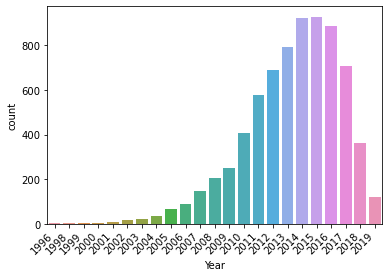

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the target variable
g = sns.countplot(cars['Year'])
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

From the above visual, we have over 500 cars of each of the year between 2011 and 2017. These are the years the cars were produced.

### Owner Type

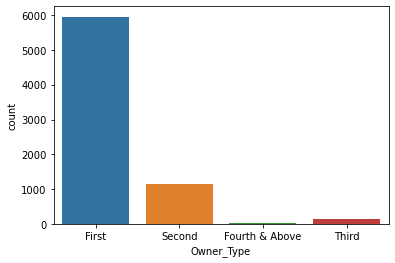

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the target variable
g = sns.countplot(cars['Owner_Type'])
plt.show()

From the above visual, we have more first hand cars for sale than others

### Transmission

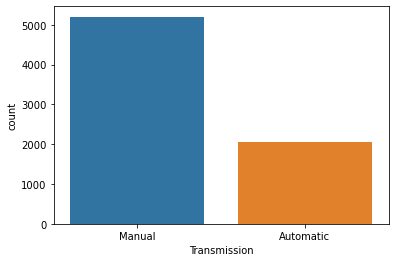

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the target variable
g = sns.countplot(cars['Transmission'])
plt.show()

From the visual above, we have more manual cars for sale than automatic cars

### Fuel Type

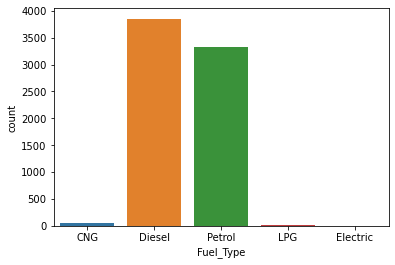

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the target variable
g = sns.countplot(cars['Fuel_Type'])
plt.show()

From the visual above, we have more disel and petrol cars for sale than other fuel type cars

### Location

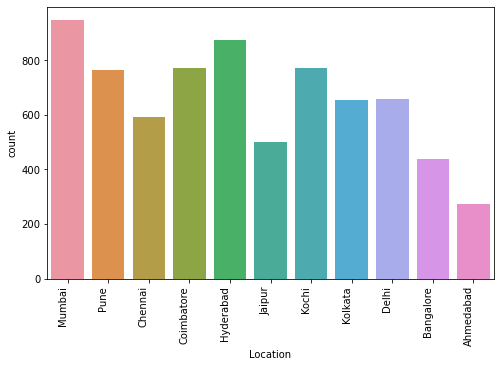

In [41]:
plt.figure(figsize = (8, 5))
g = sns.countplot(cars['Location'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

From the visual above, we have more cars being sold in Mumbai and Hyderabad

### Car Make

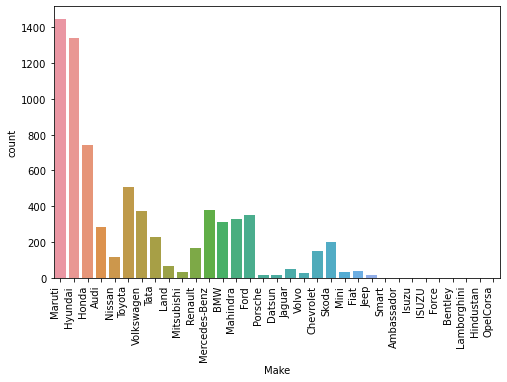

In [42]:
plt.figure(figsize = (8, 5))
g = sns.countplot(cars['Make'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

From the visual above, we have more Maruti and Hyundai make cars for sale than others

In [43]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram 

### Engine

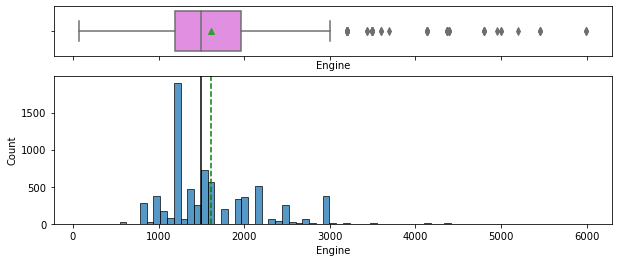

In [44]:
histogram_boxplot(cars, 'Engine', figsize=(10, 4), kde=False, bins=None)

From the visual above, we can see that there are some outliers that are was above the mean value. We have more cars with higher engine displacement volume that are above the median value

### Power

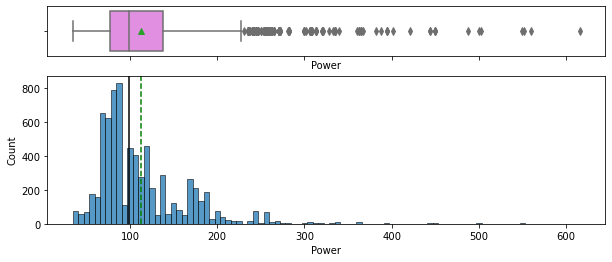

In [45]:
histogram_boxplot(cars, 'Power', figsize=(10, 4), kde=False, bins=None)

From the visual above, we can see that there are outliers that are was above the mean value. We have more cars with higher engine power that are above the median value

### Price

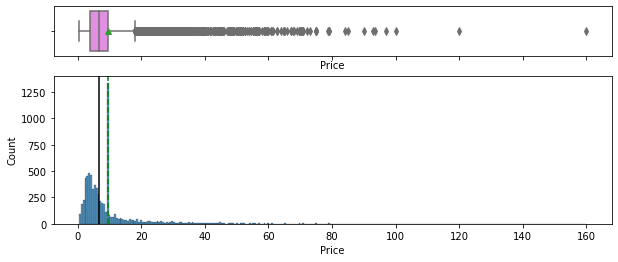

In [46]:
histogram_boxplot(cars, 'Price', figsize=(10, 4), kde=False, bins=None)

From the visual above, we can see that there are alot of outliers that are was above the mean value. For us to carry out model building with this variable or any other variable with such distribution, we will need to normalize the values so our model can predict correctly.

## Bivariate Analysis

Fuel Type by Power by Transmission

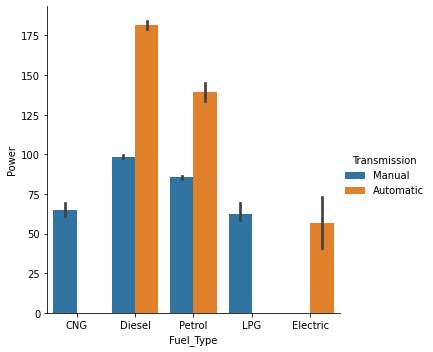

In [47]:
sns.catplot(x = 'Fuel_Type', y = 'Power', hue = 'Transmission', data = cars, kind = 'bar')
plt.show()

From the above visual, we can see that we have more automatic cars of high engine power than other transmission cars

### "Use cars Price"     by     "Car Make"

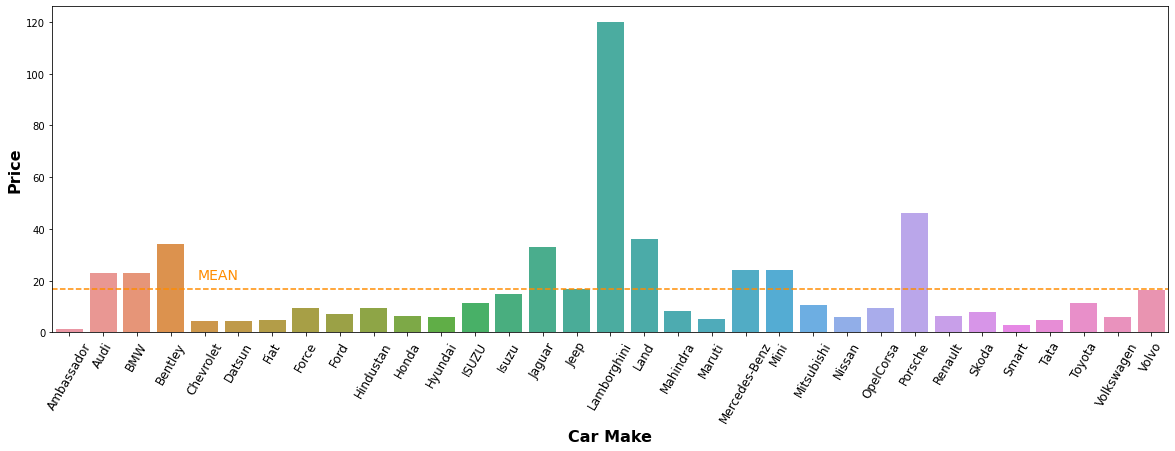

In [48]:
make_price = pd.DataFrame(columns=['Make','Price'])
for make in np.unique(cars['Make']):
    make_price.loc[len(make_price),:] = [make, cars.loc[cars['Make']==make,'Price'].mean()]
   
fig = plt.figure(figsize=[20,6]);
sns.barplot(data=make_price, y = 'Price', x = 'Make');
plt.axhline(np.mean(make_price['Price']),color='darkorange',linestyle='--',label='mean');
plt.text(5, 22, 'MEAN', ha='right', va='center', size=14, color='darkorange');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('Car Make', fontsize=16, fontweight='bold');
plt.ylabel('Price', fontsize=16, fontweight='bold');

From the above visual, Lamborghini used cars are most expensive, followed by Porsche cars

### "New cars price" by "Car Make"

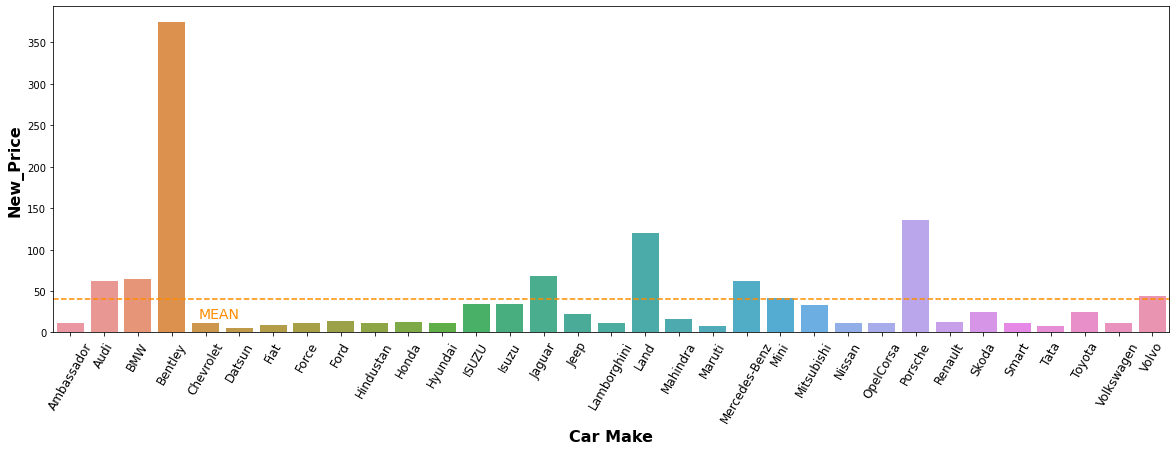

In [49]:
make_price = pd.DataFrame(columns=['Make','New_Price'])
for make in np.unique(cars['Make']):
    make_price.loc[len(make_price),:] = [make, cars.loc[cars['Make']==make,'New_Price'].mean()]
   
fig = plt.figure(figsize=[20,6]);
sns.barplot(data=make_price, y = 'New_Price', x = 'Make');
plt.axhline(np.mean(make_price['New_Price']),color='darkorange',linestyle='--',label='mean');
plt.text(5, 22, 'MEAN', ha='right', va='center', size=14, color='darkorange');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('Car Make', fontsize=16, fontweight='bold');
plt.ylabel('New_Price', fontsize=16, fontweight='bold');

From the visual above, brand new Bentley cars are most expensive than other cars

### "Used cars price" by "Year"

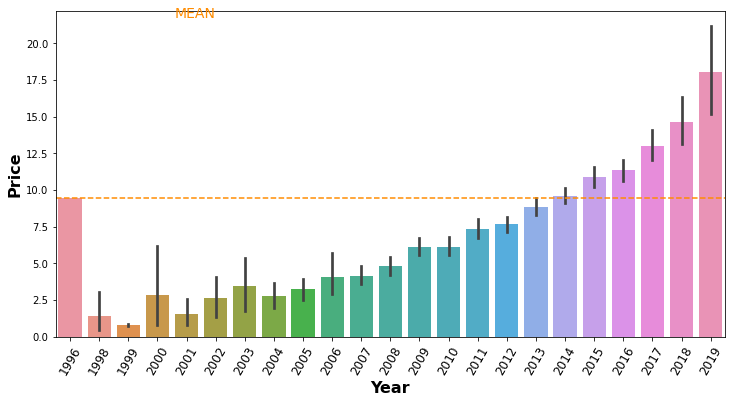

In [50]:
fig = plt.figure(figsize=[12,6]);
sns.barplot(data=cars, y = 'Price', x = 'Year');
plt.axhline(np.mean(cars['Price']),color='darkorange',linestyle='--',label='mean');
plt.text(5, 22, 'MEAN', ha='right', va='center', size=14, color='darkorange');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('Year', fontsize=16, fontweight='bold');
plt.ylabel('Price', fontsize=16, fontweight='bold');

From the visual above, 2019 used cars are the most expensive cars, as expected

### Used Cars Price by Owner Type

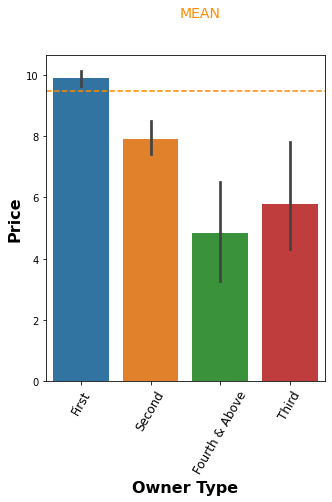

In [51]:
fig = plt.figure(figsize=[5,6]);
sns.barplot(data=cars, y = 'Price', x = 'Owner_Type');
plt.axhline(np.mean(cars['Price']),color='darkorange',linestyle='--',label='mean');
plt.text(2, 12, 'MEAN', ha='right', va='center', size=14, color='darkorange');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('Owner Type', fontsize=16, fontweight='bold');
plt.ylabel('Price', fontsize=16, fontweight='bold');

From the visual above, we have first hand cars are more expensive than other car owner type

### New Car Price by Owner Type

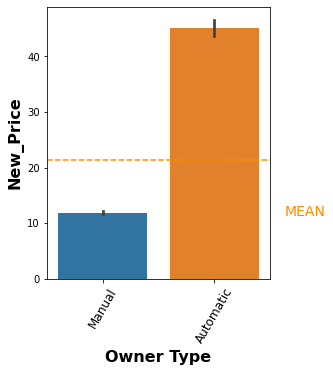

In [52]:
fig = plt.figure(figsize=[4,5]);
sns.barplot(data=cars, y = 'New_Price', x = 'Transmission');
plt.axhline(np.mean(cars['New_Price']),color='darkorange',linestyle='--',label='mean');
plt.text(2, 12, 'MEAN', ha='right', va='center', size=14, color='darkorange');
plt.xticks(rotation=60, fontsize = 12);
plt.xlabel('Owner Type', fontsize=16, fontweight='bold');
plt.ylabel('New_Price', fontsize=16, fontweight='bold');

From the visual above, for new cars, automatic cars are more expensive than manual cars

## Pre Modelling

To carry out our modelling, we start by first preprocessing our data. The following below are steps we will be carrying out in this session.

* Dropping the "Make" column
* Converting the categorical variable to numerical by applying label encoding
* Selecting the features and target of the dataset
* Split the data into training and test sets
* Normalizing the dataset by applying MinMaxScaler

In [53]:
# Dropping the make column, as it was created for the purpose of visualisation
cars.drop(['Make'], axis=1, inplace=True)

In [54]:
cars.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Mileage
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998.0,58.16,5.0,5.51,1.75,4.788
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582.0,126.20,5.0,16.06,12.50,19.670


In [55]:
#Converting the categorical variables to numerical values
#create an instance of label encoder which we will be using
label_encoder = LabelEncoder()

cars['Name'] = label_encoder.fit_transform(cars['Name'])
cars['Location'] = label_encoder.fit_transform(cars['Location'])
cars['Fuel_Type'] = label_encoder.fit_transform(cars['Fuel_Type'])
cars['Transmission'] = label_encoder.fit_transform(cars['Transmission'])
cars['Owner_Type'] = label_encoder.fit_transform(cars['Owner_Type'])

In [56]:
#selecting the target variable and features from the dataset
features = cars.drop("Price", axis = 1).values
target = cars["Price"]

In [57]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=0)
    
#normalizing the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Building - Creating function to build our model and for evaluation metrics

In this session, we will be creating a function to predict our car prices and equally check the accuracy of our model using some evaluation metrics such as training accuracy, test accuracy, mean squared error, mean absolute error,r squared and adjusted r squared.

In [58]:
#function to build our model and check our evaluation metrics

def modelling (model_name, x_train, x_test, y_train, y_test):
    #create an instance of the model
    
    model = model_name
    
    #fitting the model
    model.fit(x_train, y_train)
    
    #get the training and testing accuracy
    
    Training_Accuracy = model.score(x_train, y_train) * 100
    Test_Accuracy = model.score(x_test, y_test)* 100
    
    #checking y predictions
    pred = model.predict(x_test)
    
   
    # Evaluation Metrics
 
#Computing the adjusted R-squared
    r2 = r2_score(y_test, pred) # to compute R-squared
    n = x_test.shape[0]
    k = x_test.shape[1]
    adj_r2_score = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#Computing the Mean absolute percentage error (MAPE)   
    mape_score = np.mean(np.abs(y_test - pred) / y_test) * 100
    
#Computing the Root mean squared error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, pred))  

#Computing the Mean absolute error (MAE)
    mae = mean_absolute_error(y_test, pred)  
    
    adjr2 = adj_r2_score  # adjusted R-squared
    mape = mape_score  #  MAPE

    # creating a dataframe of the evaluation metrics
    df_perf = pd.DataFrame(
        {
            "Train_acc": [Training_Accuracy],
            "Test_acc": [Test_Accuracy],
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )
    
    pred = pd.DataFrame(data = pred)

    
    return pred, df_perf

### Linear Regression

In [59]:
#calling on the Linear Regression  modelling function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pred_linear, df_perf_linear = modelling (LinearRegression(), x_train, x_test, y_train, y_test)

In [60]:
#checking the linear regression evaluation metrics dataframe
df_perf_linear

,Train_acc,Test_acc,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,63.380713,61.419025,6.55726,3.631214,0.61419,0.6107,53.454577


In [61]:
#check first five of the prediction
pred_linear.head(5)

,0
0,10.579182
1,7.665010
2,8.844607
3,-8.474417
4,4.269553


### Random Forest Regression

In [62]:
#calling on the Random Forest Regressionn  modelling function
from sklearn.ensemble import RandomForestRegressor

pred_random, df_perf_random = modelling (RandomForestRegressor(), x_train, x_test, y_train, y_test)

In [63]:
#checking the random regression evaluation metrics dataframe
df_perf_random

,Train_acc,Test_acc,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,98.529541,91.206946,3.130442,1.223042,0.912069,0.911274,13.525852


In [64]:
#check first five of the prediction
pred_random.head(5)

,0
0,6.490400
1,5.577700
2,9.479468
3,0.883700
4,3.474400


### Decision Tree Regression

In [65]:
#calling on the Random Forest Regressionn  modelling function
from sklearn.tree import DecisionTreeRegressor

pred_tree, df_perf_tree = modelling (DecisionTreeRegressor(max_features=7,max_depth=10,min_samples_leaf=2, random_state=0), 
                                     x_train, x_test, y_train, y_test)

In [66]:
#checking the decision tree regression evaluation metrics dataframe
df_perf_tree

,Train_acc,Test_acc,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,94.471471,86.869567,3.825386,1.627331,0.868696,0.867508,19.017528


In [67]:
#check first five of the prediction
pred_tree.head(5)

,0
0,6.232460
1,5.908711
2,9.479468
3,1.045294
4,3.085956


### KNN Regression

In [68]:
#calling on the Random Forest Regressionn  modelling function
from sklearn.neighbors import KNeighborsRegressor

pred_knn, df_perf_knn = modelling (KNeighborsRegressor(), x_train, x_test, y_train, y_test)

In [69]:
#checking the KNN regression evaluation metrics dataframe
df_perf_knn

,Train_acc,Test_acc,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,83.803873,69.451172,5.834895,2.579174,0.694512,0.691748,32.245249


In [70]:
#check first five of the prediction
pred_knn.head(5)

,0
0,5.040000
1,5.764000
2,9.479468
3,2.625894
4,3.750000


## Conclusion

The task of this project is to predict the prices of used cars in the country based on the given features. We decided to build four regression models for this prediction. The models developed includes:

* Linear Regression
* Random Forest Regression
* Decision Tree Regression
* KNN Regression

We evaluated the models performances using some evaluation metrics such as training accuracy, test accuracy, C, mean absolute error, r squared and adjusted r squared.

#### Findings

Based on the evaluation metrics of the models, the best performing model is the Random Forest Regressor. It has the highest Training Accuracy of 98.36% and Test Accuracy of 91.23%. It also has the least RMSE and MAE error evaluation values (lower RMSE and MAE means the model has less errors and is a better performing model). The coefficient of determination (R-SQUARED) is the highest which is very much close to 1 (the closer the r-square value is to 1, it indicates that the model fits perfectly to the dataset provided). The MAPE value is the lowest, which is 13.47% (the lower the MAPE value, the better the model is at forcasting values).

In [71]:
df_perf_random

,Train_acc,Test_acc,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,98.529541,91.206946,3.130442,1.223042,0.912069,0.911274,13.525852


#### Printing the Test Set Prediction, using Random Forest Regressor

In [72]:
#Predicted Values
pred_random.head(5)

,0
0,6.490400
1,5.577700
2,9.479468
3,0.883700
4,3.474400


In [73]:
# Actual Values
y_test.head()

4178    6.900000
528     5.750000
7235    9.479468
4658    0.950000
4281    3.000000
Name: Price, dtype: float64